In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_for_ml_v5.csv')
df.isna().sum()

date                   0
time                   0
timestamp              0
date_of_week           0
hour                   0
quarter_of_year        0
month                  0
day_of_year            0
day_of_month           0
week_of_year           0
is_lunch_break         0
is_class_time          0
is_weekday             0
is_Thai_holiday        0
is_exam_period         0
academic_calendar      0
weather_condition     14
temperature           14
humidity              14
wind_speed            14
pressure              14
count_1204             0
count_0412             0
count_1211             0
Students             252
dtype: int64

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True)
df['weather_condition'].fillna(df['weather_condition'].mode().iloc[0], inplace=True)
df

,date,time,timestamp,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,...,academic_calendar,weather_condition,temperature,humidity,wind_speed,pressure,count_1204,count_0412,count_1211,Students
0,1/1/2019,07:00,2019-01-01 07:00:00,3,7,1,1,1,1,1,...,HOLIDAY,Fair,21.0,0.73,6.0,30.05,0,0,0,0.0
1,1/1/2019,08:00,2019-01-01 08:00:00,3,8,1,1,1,1,1,...,HOLIDAY,Fair,21.0,0.73,8.0,30.08,0,0,0,0.0
2,1/1/2019,09:00,2019-01-01 09:00:00,3,9,1,1,1,1,1,...,HOLIDAY,Fair,23.0,0.69,7.0,30.08,0,0,0,0.0
3,1/1/2019,10:00,2019-01-01 10:00:00,3,10,1,1,1,1,1,...,HOLIDAY,Fair,24.0,0.65,6.0,30.08,0,0,0,0.0
4,1/1/2019,11:00,2019-01-01 11:00:00,3,11,1,1,1,1,1,...,HOLIDAY,Fair,26.0,0.57,0.0,30.08,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817,30/9/2019,16:00,2019-09-30 16:00:00,2,16,3,9,273,30,40,...,2019/1,Fair,30.0,0.74,3.0,29.87,0,0,1,NaN
3818,30/9/2019,17:00,2019-09-30 17:00:00,2,17,3,9,273,30,40,...,2019/1,Light Rain,32.0,0.66,7.0,29.73,0,0,0,NaN
3819,30/9/2019,18:00,2019-09-30 18:00:00,2,18,3,9,273,30,40,...,2019/1,Light Rain,29.0,0.84,3.0,29.76,0,0,0,NaN
3820,30/9/2019,19:00,2019-09-30 19:00:00,2,19,3,9,273,30,40,...,2019/1,Light Rain with Thunder,28.0,0.84,20.0,29.79,0,0,0,NaN


In [ ]:
cs = pd.read_csv('class_schedule.csv')
cs

In [ ]:
mon = cs[cs['day_of_week'] == 2]
tue = cs[cs['day_of_week'] == 3]
wed = cs[cs['day_of_week'] == 4]
thu = cs[cs['day_of_week'] == 5]
fri = cs[cs['day_of_week'] == 6]

In [ ]:
mon2018_2 = mon[mon['academic_calendar'] == '2018/summer semester']
mon_new = mon2018_2.groupby(['FLOORED_class_start_time','CEILED_class_end_time']).agg({'enrolled_students_amount': ['sum']})
mon_new

In [4]:
is_lunch_break = pd.get_dummies(df['is_lunch_break'], prefix='lunchbreak', drop_first=True)
# is_class_time = pd.get_dummies(df['is_class_time'], prefix='classtime', drop_first=True)
is_weekday = pd.get_dummies(df['is_weekday'], drop_first=True)
is_Thai_holiday = pd.get_dummies(df['is_Thai_holiday'], prefix='holiday', drop_first=True)
is_exam_period = pd.get_dummies(df['is_exam_period'], prefix='exam', drop_first=True)
academic_calendar = pd.get_dummies(df['academic_calendar'], drop_first=True)
weather_condition = pd.get_dummies(df['weather_condition'], drop_first=True)

df.drop(['is_lunch_break', 'is_class_time', 'is_weekday', 'is_Thai_holiday', 'is_exam_period', 'academic_calendar', 'weather_condition'], axis=1, inplace=True)
# df = pd.concat([df, is_lunch_break, is_class_time, is_weekday, is_Thai_holiday, is_exam_period, academic_calendar, weather_condition], axis=1)
df = pd.concat([df, is_lunch_break, is_weekday, is_Thai_holiday, is_exam_period, academic_calendar, weather_condition], axis=1)

In [5]:
train_prophet = df.iloc[:3402]

X_train = df.iloc[:3402]
X_train_na = X_train[['temperature', 'humidity', 'wind_speed', 'pressure', 'Students']]
X_train.drop(['date', 'time', 'temperature', 'humidity', 'wind_speed', 'pressure', 'Students'], axis=1, inplace=True)
X_train

,timestamp,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,count_1204,count_0412,...,Partly Cloudy,Partly Cloudy / Windy,Rain,Rain / Windy,Rain Shower,Showers in the Vicinity,T-Storm,T-Storm / Windy,Thunder,Thunder in the Vicinity
0,2019-01-01 07:00:00,3,7,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-01-01 08:00:00,3,8,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 09:00:00,3,9,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 10:00:00,3,10,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 11:00:00,3,11,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,2019-08-31 16:00:00,7,16,3,8,243,31,35,0,0,...,1,0,0,0,0,0,0,0,0,0
3398,2019-08-31 17:00:00,7,17,3,8,243,31,35,0,0,...,0,0,0,0,0,0,0,0,0,0
3399,2019-08-31 18:00:00,7,18,3,8,243,31,35,0,0,...,0,0,0,0,0,0,0,0,0,0
3400,2019-08-31 19:00:00,7,19,3,8,243,31,35,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_prophet = df.iloc[3402:]

X_test = df.iloc[3402:]
X_test_na = X_test[['temperature', 'humidity', 'wind_speed', 'pressure', 'Students']]
X_test.drop(['date', 'time', 'temperature', 'humidity', 'wind_speed', 'pressure', 'Students'], axis=1, inplace=True)
X_test

,timestamp,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,count_1204,count_0412,...,Partly Cloudy,Partly Cloudy / Windy,Rain,Rain / Windy,Rain Shower,Showers in the Vicinity,T-Storm,T-Storm / Windy,Thunder,Thunder in the Vicinity
3402,2019-09-01 07:00:00,1,7,3,9,244,1,35,0,0,...,1,0,0,0,0,0,0,0,0,0
3403,2019-09-01 08:00:00,1,8,3,9,244,1,35,0,0,...,0,0,0,0,0,0,0,0,0,0
3404,2019-09-01 09:00:00,1,9,3,9,244,1,35,0,0,...,0,0,0,0,0,0,0,0,0,0
3405,2019-09-01 10:00:00,1,10,3,9,244,1,35,0,0,...,0,0,0,0,0,0,0,0,0,0
3406,2019-09-01 11:00:00,1,11,3,9,244,1,35,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817,2019-09-30 16:00:00,2,16,3,9,273,30,40,0,0,...,0,0,0,0,0,0,0,0,0,0
3818,2019-09-30 17:00:00,2,17,3,9,273,30,40,0,0,...,0,0,0,0,0,0,0,0,0,0
3819,2019-09-30 18:00:00,2,18,3,9,273,30,40,0,0,...,0,0,0,0,0,0,0,0,0,0
3820,2019-09-30 19:00:00,2,19,3,9,273,30,40,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train_na.fillna(X_train_na.mean(), inplace=True)
X_test_na.fillna(X_test_na.mean(), inplace=True)

# scaler = StandardScaler().fit(X_train_na)
scaler = MinMaxScaler().fit(X_train_na)
X_train_na = pd.DataFrame(scaler.fit_transform(X_train_na), columns=X_train_na.columns)
X_test_na = pd.DataFrame(scaler.fit_transform(X_test_na), columns=X_test_na.columns)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
X_train_na

,temperature,humidity,wind_speed,pressure,Students
0,0.000000,0.674699,0.200000,0.946429,0.0
1,0.000000,0.674699,0.266667,1.000000,0.0
2,0.105263,0.626506,0.233333,1.000000,0.0
3,0.157895,0.578313,0.200000,1.000000,0.0
4,0.263158,0.481928,0.000000,1.000000,0.0
...,...,...,...,...,...
3397,0.421053,0.746988,0.300000,0.160714,0.0
3398,0.421053,0.746988,0.266667,0.160714,0.0
3399,0.421053,0.746988,0.266667,0.160714,0.0
3400,0.368421,0.807229,0.333333,0.214286,0.0


In [8]:
X_train = pd.concat([X_train, X_train_na], axis=1)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test, X_test_na], axis=1)

X_train_clone = X_train
X_test_clone = X_test

X_train.rename(columns = {'timestamp': 'ds', 'count_1204': 'y'}, inplace=True)
X_test.rename(columns = {'timestamp': 'ds', 'count_1204': 'y'}, inplace=True)

In [ ]:
# train_prophet = df.iloc[:3612]
# train_prophet.rename(columns={'timestamp': 'ds', 'count_1204': 'y'}, inplace=True)
# train_prophet

In [ ]:
# test_prophet = df.iloc[3612:]
# test_prophet.rename(columns={'timestamp': 'ds', 'count_1204': 'y'}, inplace=True)
# test_prophet

In [9]:
for_future = pd.concat([X_train, X_test])
# for_future.drop(['date', 'time'], axis=1, inplace=True)
for_future.reset_index(drop=True, inplace=True)
for_future

,ds,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,y,count_0412,...,Showers in the Vicinity,T-Storm,T-Storm / Windy,Thunder,Thunder in the Vicinity,temperature,humidity,wind_speed,pressure,Students
0,2019-01-01 07:00:00,3,7,1,1,1,1,1,0,0,...,0,0,0,0,0,0.000000,0.674699,0.200000,0.946429,0.000000
1,2019-01-01 08:00:00,3,8,1,1,1,1,1,0,0,...,0,0,0,0,0,0.000000,0.674699,0.266667,1.000000,0.000000
2,2019-01-01 09:00:00,3,9,1,1,1,1,1,0,0,...,0,0,0,0,0,0.105263,0.626506,0.233333,1.000000,0.000000
3,2019-01-01 10:00:00,3,10,1,1,1,1,1,0,0,...,0,0,0,0,0,0.157895,0.578313,0.200000,1.000000,0.000000
4,2019-01-01 11:00:00,3,11,1,1,1,1,1,0,0,...,0,0,0,0,0,0.263158,0.481928,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817,2019-09-30 16:00:00,2,16,3,9,273,30,40,0,0,...,0,0,0,0,0,0.500000,0.559322,0.142857,0.657143,0.192085
3818,2019-09-30 17:00:00,2,17,3,9,273,30,40,0,0,...,0,0,0,0,0,0.700000,0.423729,0.333333,0.257143,0.192085
3819,2019-09-30 18:00:00,2,18,3,9,273,30,40,0,0,...,0,0,0,0,0,0.400000,0.728814,0.142857,0.342857,0.192085
3820,2019-09-30 19:00:00,2,19,3,9,273,30,40,0,0,...,0,0,0,0,0,0.300000,0.728814,0.952381,0.428571,0.192085


In [10]:
train_plot = train_prophet[['date', 'count_1204']]
train_plot['date'] = pd.to_datetime(train_plot['date'], dayfirst=True)
train_plot = train_plot.groupby(['date']).sum()
train_plot

,count_1204
date,
2019-01-01,0
2019-01-02,0
2019-01-03,0
2019-01-04,0
2019-01-05,0
...,...
2019-08-27,5
2019-08-28,7
2019-08-29,2


In [11]:
test_plot = test_prophet[['date', 'count_1204']]
test_plot['date'] = pd.to_datetime(test_plot['date'], dayfirst=True)
test_plot = test_plot.groupby(['date']).sum()
test_plot

,count_1204
date,
2019-09-01,0
2019-09-02,5
2019-09-03,2
2019-09-04,10
2019-09-05,8
2019-09-06,10
2019-09-07,0
2019-09-08,0
2019-09-09,6


In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train_plot, color='#1f77b4')
plt.plot(test_plot, color='#1f77b4')
plt.xlabel('Days', fontsize=20, labelpad=20)
plt.ylabel('Demand', fontsize=20, labelpad=20)
plt.title(label = 'Daily demand count for route CU terrace - Engineering', fontsize = 20)
plt.show()

In [12]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

# X_train['cap'] = 6
# X_train['floor'] = 0
# m = Prophet(growth='logistic', changepoint_prior_scale=0.001)
m = Prophet(changepoint_prior_scale=0.5)
m.add_regressor('date_of_week')
m.add_regressor('hour')
m.add_regressor('quarter_of_year')
m.add_regressor('month')
m.add_regressor('day_of_year')
m.add_regressor('day_of_month')
m.add_regressor('week_of_year')
m.add_regressor('lunchbreak_YES')
# m.add_regressor('classtime_YES')
m.add_regressor('WEEKEND')
m.add_regressor('holiday_NORMAL')
m.add_regressor('exam_NORMAL')
m.add_regressor('temperature')
m.add_regressor('humidity')
m.add_regressor('wind_speed')
m.add_regressor('pressure')
# m.add_regressor('2018/2')
m.add_regressor('2018/SUMMER')
m.add_regressor('2019/1')
m.add_regressor('HOLIDAY')
# m.add_regressor('Cloudy')
m.add_regressor('Fair')
m.add_regressor('Fair / Windy')
m.add_regressor('Fog')
m.add_regressor('Haze')
m.add_regressor('Heavy Rain')
m.add_regressor('Heavy Rain / Windy')
m.add_regressor('Heavy T-Storm')
m.add_regressor('Heavy T-Storm / Windy')
m.add_regressor('Light Rain')
m.add_regressor('Light Rain Shower')
m.add_regressor('Light Rain Shower / Windy')
m.add_regressor('Light Rain with Thunder')
m.add_regressor('Mostly Cloudy')
m.add_regressor('Mostly Cloudy / Windy')
m.add_regressor('Partly Cloudy')
m.add_regressor('Partly Cloudy / Windy')
m.add_regressor('Rain')
m.add_regressor('Rain / Windy')
m.add_regressor('Rain Shower')
m.add_regressor('Showers in the Vicinity')
m.add_regressor('T-Storm')
m.add_regressor('T-Storm / Windy')
m.add_regressor('Thunder')
m.add_regressor('Thunder in the Vicinity')
m.add_regressor('Students')
m.fit(X_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods=720, freq='H')
# future['cap'] = 6
# future['floor'] = 0
future = future[(future['ds'].dt.hour >= 7) & (future['ds'].dt.hour < 21)]
# future = future[future['ds'].dt.dayofweek < 5]
future.reset_index(drop=True, inplace=True)
future['date_of_week'] = for_future['date_of_week']
future['hour'] = for_future['hour']
future['quarter_of_year'] = for_future['quarter_of_year']
future['month'] = for_future['month']
future['day_of_year'] = for_future['day_of_year']
future['day_of_month'] = for_future['day_of_month']
future['week_of_year'] = for_future['week_of_year']
future['lunchbreak_YES'] = for_future['lunchbreak_YES']
# future['classtime_YES'] = for_future['classtime_YES']
future['WEEKEND'] = for_future['WEEKEND']
future['holiday_NORMAL'] = for_future['holiday_NORMAL']
future['exam_NORMAL'] = for_future['exam_NORMAL']
future['temperature'] = for_future['temperature']
future['humidity'] = for_future['humidity']
future['wind_speed'] = for_future['wind_speed']
future['pressure'] = for_future['pressure']
# future['2018/2'] = for_future['2018/2']
future['2018/SUMMER'] = for_future['2018/SUMMER']
future['2019/1'] = for_future['2019/1']
future['HOLIDAY'] = for_future['HOLIDAY']
# future['Cloudy'] = for_future['Cloudy']
future['Fair'] = for_future['Fair']
future['Fair / Windy'] = for_future['Fair / Windy']
future['Fog'] = for_future['Fog']
future['Haze'] = for_future['Haze']
future['Heavy Rain'] = for_future['Heavy Rain']
future['Heavy Rain / Windy'] = for_future['Heavy Rain / Windy']
future['Heavy T-Storm'] = for_future['Heavy T-Storm']
future['Heavy T-Storm / Windy'] = for_future['Heavy T-Storm / Windy']
future['Light Rain'] = for_future['Light Rain']
future['Light Rain Shower'] = for_future['Light Rain Shower']
future['Light Rain Shower / Windy'] = for_future['Light Rain Shower / Windy']
future['Light Rain with Thunder'] = for_future['Light Rain with Thunder']
future['Mostly Cloudy'] = for_future['Mostly Cloudy']
future['Mostly Cloudy / Windy'] = for_future['Mostly Cloudy / Windy']
future['Partly Cloudy'] = for_future['Partly Cloudy']
future['Partly Cloudy / Windy'] = for_future['Partly Cloudy / Windy']
future['Rain'] = for_future['Rain']
future['Rain / Windy'] = for_future['Rain / Windy']
future['Rain Shower'] = for_future['Rain Shower']
future['Showers in the Vicinity'] = for_future['Showers in the Vicinity']
future['T-Storm'] = for_future['T-Storm']
future['T-Storm / Windy'] = for_future['T-Storm / Windy']
future['Thunder'] = for_future['Thunder']
future['Thunder in the Vicinity'] = for_future['Thunder in the Vicinity']
future['Students'] = for_future['Students']

forecast = m.predict(future)
yhat_round = []
for each in forecast['yhat']:
    if (each < 0):
        each = 0
    elif ((each*10)%10 >= 5):
        each = math.ceil(each)
    else:
        each = math.floor(each)
        
#     if(each < 0):
#         each = 0
#     elif ((each*10)%10 >= 8):
#         each = math.ceil(each)
#     else:
#         each = math.floor(each)

#     each = math.ceil(each)
    yhat_round.append(each)
forecast['yhat_no_round'] = forecast['yhat']
# forecast['yhat'] = yhat_round
forecast[['ds', 'yhat', 'yhat_no_round', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_no_round,yhat_lower,yhat_upper
0,2019-01-01 07:00:00,0.185932,0.185932,-0.280326,0.630641
1,2019-01-01 08:00:00,0.460195,0.460195,0.002595,0.921516
2,2019-01-01 09:00:00,0.284037,0.284037,-0.167174,0.704424
3,2019-01-01 10:00:00,0.122308,0.122308,-0.334679,0.601626
4,2019-01-01 11:00:00,0.029698,0.029698,-0.429970,0.512838
...,...,...,...,...,...
3817,2019-09-30 16:00:00,0.409706,0.409706,-0.098827,0.923819
3818,2019-09-30 17:00:00,-0.064682,-0.064682,-0.590685,0.411183
3819,2019-09-30 18:00:00,0.138690,0.138690,-0.337567,0.597730
3820,2019-09-30 19:00:00,0.185597,0.185597,-0.293715,0.670592


In [ ]:
m.plot(forecast)
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='180 days', period='7 days', horizon = '30 days')
df_cv

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

In [14]:
forecast_result = forecast[['ds', 'yhat']]
forecast_result.reset_index(drop=True, inplace=True)
forecast_result

,ds,yhat
0,2019-01-01 07:00:00,0.185932
1,2019-01-01 08:00:00,0.460195
2,2019-01-01 09:00:00,0.284037
3,2019-01-01 10:00:00,0.122308
4,2019-01-01 11:00:00,0.029698
...,...,...
3817,2019-09-30 16:00:00,0.409706
3818,2019-09-30 17:00:00,-0.064682
3819,2019-09-30 18:00:00,0.138690
3820,2019-09-30 19:00:00,0.185597


In [15]:
def extract_date(df):
    each_date = []
    
    for ts in df['ds']:
        ts = str(ts)
        date = ts[0:10]
        each_date.append(date)
    
    df['date'] = each_date
    
    return df

In [16]:
forecast_fit = forecast_result.iloc[:len(X_train)]
forecast_fit = extract_date(forecast_fit)
forecast_fit['date'] = pd.to_datetime(forecast_fit['date'], dayfirst=True)
forecast_fit = forecast_fit.groupby(['date']).sum()
forecast_fit

,yhat
date,
2019-01-01,0.180381
2019-01-02,0.586132
2019-01-03,0.235941
2019-01-04,1.178063
2019-01-05,-0.830471
...,...
2019-08-27,4.192694
2019-08-28,3.914842
2019-08-29,3.576539


In [17]:
forecast_test = forecast_result.iloc[len(X_train):]
forecast_test = extract_date(forecast_test)
forecast_test['date'] = pd.to_datetime(forecast_test['date'], dayfirst=True)
forecast_test = forecast_test.groupby(['date']).sum()
forecast_test

,yhat
date,
2019-09-01,0.913735
2019-09-02,2.295568
2019-09-03,3.599034
2019-09-04,4.643935
2019-09-05,2.880078
2019-09-06,3.814311
2019-09-07,-0.927822
2019-09-08,0.023585
2019-09-09,2.591253


In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

def join_eva(train, forecast):
    forecast = forecast[:len(train)]
    
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(train.set_index('ds'))

def cal_metrics(df):
    print(df)
    r2 = r2_score(df['y'], df['yhat'])
    rmse = np.sqrt(mean_squared_error(df['y'], df['yhat']))
    mae = mean_absolute_error(df['y'], df['yhat'])
    mdae = median_absolute_error(df['y'], df['yhat'])
    
    return 'r2:', np.round(r2,4), 'rmse', np.round(rmse, 4), 'mae', np.round(mae, 4), 'mdae', np.round(mdae, 4)

def join_test(test, forecast):
    forecast = forecast[-len(test):]
    
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(test.set_index('ds'))

In [20]:
train_result = join_eva(X_train, forecast)
print(cal_metrics(train_result))

                         yhat  yhat_lower  yhat_upper  date_of_week  hour  \
ds                                                                          
2019-01-01 07:00:00  0.185932   -0.280326    0.630641             3     7   
2019-01-01 08:00:00  0.460195    0.002595    0.921516             3     8   
2019-01-01 09:00:00  0.284037   -0.167174    0.704424             3     9   
2019-01-01 10:00:00  0.122308   -0.334679    0.601626             3    10   
2019-01-01 11:00:00  0.029698   -0.429970    0.512838             3    11   
...                       ...         ...         ...           ...   ...   
2019-08-31 16:00:00  0.170704   -0.282527    0.616847             7    16   
2019-08-31 17:00:00  0.218094   -0.268425    0.665543             7    17   
2019-08-31 18:00:00  0.186049   -0.309679    0.686084             7    18   
2019-08-31 19:00:00  0.222287   -0.274504    0.660613             7    19   
2019-08-31 20:00:00  0.207362   -0.250631    0.708543             7    20   

In [21]:
test_result = join_test(X_test, forecast)
print(cal_metrics(test_result))

                         yhat  yhat_lower  yhat_upper  date_of_week  hour  \
ds                                                                          
2019-09-01 07:00:00  0.037870   -0.451040    0.509774             1     7   
2019-09-01 08:00:00  0.215374   -0.274000    0.640166             1     8   
2019-09-01 09:00:00  0.088471   -0.366800    0.560366             1     9   
2019-09-01 10:00:00 -0.060393   -0.543180    0.404189             1    10   
2019-09-01 11:00:00 -0.099765   -0.611124    0.383526             1    11   
...                       ...         ...         ...           ...   ...   
2019-09-30 16:00:00  0.409706   -0.098827    0.923819             2    16   
2019-09-30 17:00:00 -0.064682   -0.590685    0.411183             2    17   
2019-09-30 18:00:00  0.138690   -0.337567    0.597730             2    18   
2019-09-30 19:00:00  0.185597   -0.293715    0.670592             2    19   
2019-09-30 20:00:00  0.004941   -0.480669    0.463955             2    20   

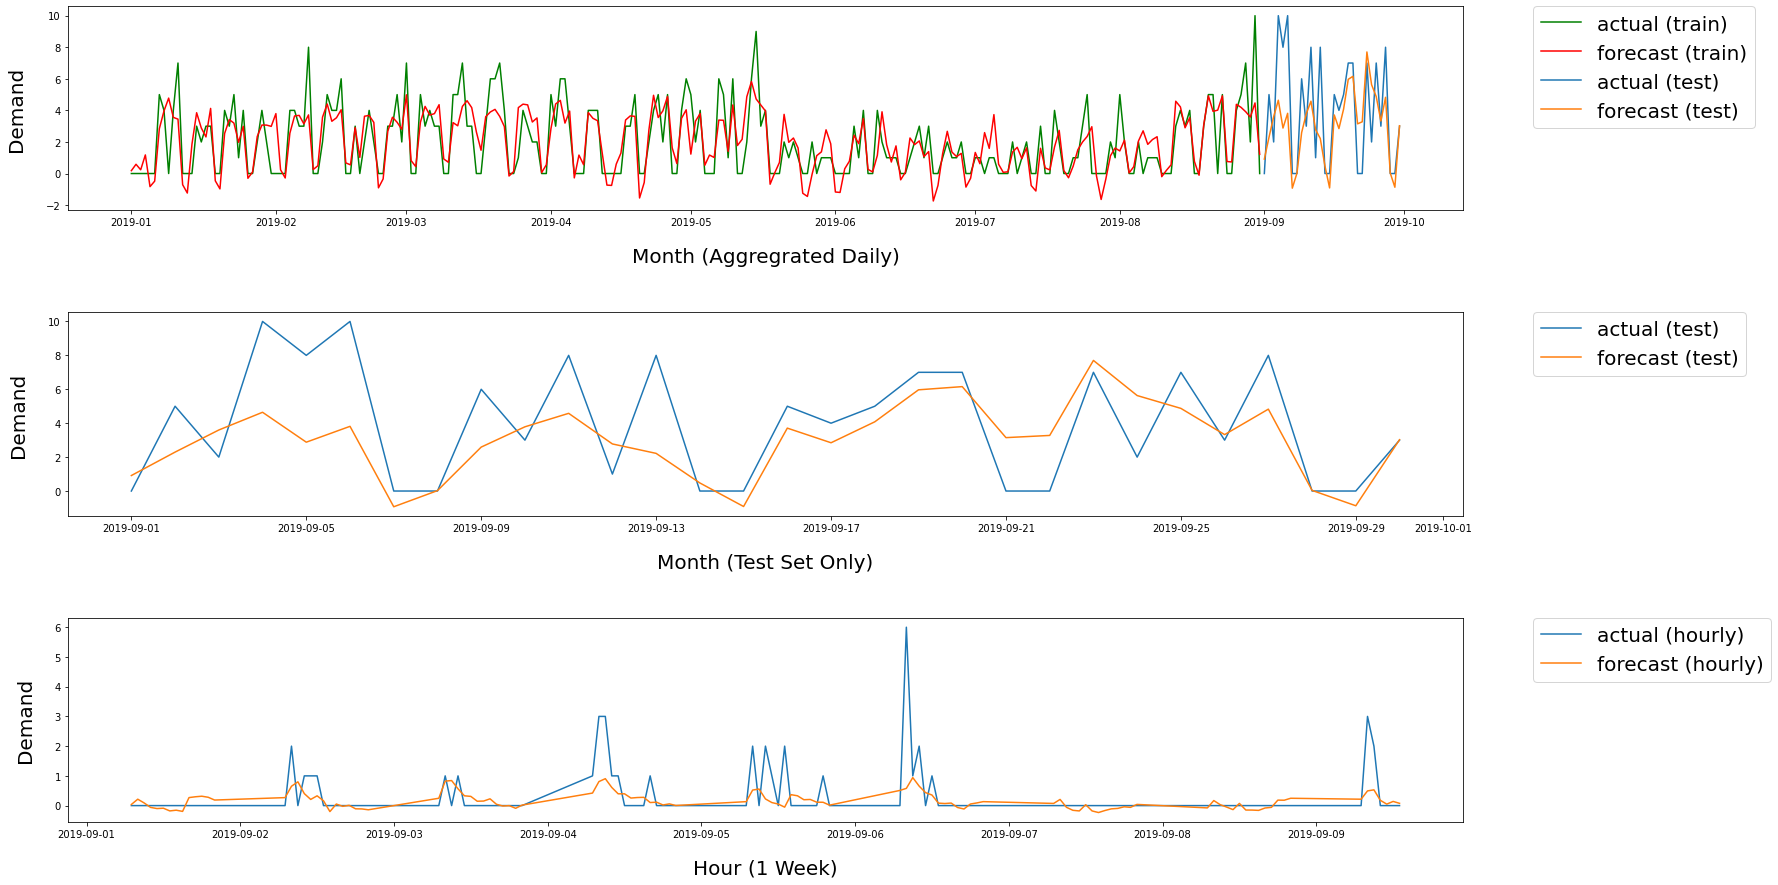

In [22]:
plt.figure(figsize=(25,15))
plt.subplot(311)
plt.plot(train_plot, label='actual (train)', color='g')
plt.plot(forecast_fit, label='forecast (train)', color='r')
plt.plot(test_plot, label='actual (test)', color='#1f77b4')
plt.plot(forecast_test, label='forecast (test)', color='#ff7f0e')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=20)
plt.xlabel('Month (Aggregrated Daily)', fontsize=20, labelpad=20)
plt.ylabel('Demand', fontsize=20, labelpad=20)
plt.subplot(312)
plt.plot(test_plot, label='actual (test)')
plt.plot(forecast_test, label='forecast (test)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=20)
plt.xlabel('Month (Test Set Only)', fontsize=20, labelpad=20)
plt.ylabel('Demand', fontsize=20, labelpad=20)
plt.subplot(313)
for_plot = test_result[:119]
plt.plot(for_plot['y'], label='actual (hourly)')
plt.plot(for_plot['yhat'], label='forecast (hourly)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=20)
plt.xlabel('Hour (1 Week)', fontsize=20, labelpad=20)
plt.ylabel('Demand', fontsize=20, labelpad=20)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
train_plot, forecast_fit

In [ ]:
def cal_summed(y, yhat):
#     print(df)
    r2 = r2_score(y, yhat)
    rmse = np.sqrt(mean_squared_error(y, yhat))
    mae = mean_absolute_error(y, yhat)
    
    return 'r2:', np.round(r2,4), 'rmse', np.round(rmse, 4), 'mae', np.round(mae, 4)

print(cal_summed(test_plot, forecast_test))

In [ ]:
test
all features no round (0.2503, 0.5668, 0.3592)

pure no round (0.1806, 0.5925, 0.4352)
pure round at 5 (0.0887, 0.6249, 0.2762)
pure round at 6 (0.0998, 0.6211, 0.2619)


all features round at 5 (0.1665, 0.5976, 0.2714)
all features round at 6 (0.1665, 0.5976, 0.2429)

In [ ]:
import itertools
from itertools import product
import statsmodels as sm
import statsmodels.api as sm_api
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
from tqdm import tqdm_notebook

In [ ]:
endo = X_train_clone[['ds', 'y']]
endo['ds'] = pd.to_datetime(endo['ds'], dayfirst=True)
endo.set_index('ds', inplace=True)
endo

In [ ]:
exo = X_train_clone.drop(['y', 'count_0412', 'count_1211', 'Students'],axis=1)
exo['ds'] = pd.to_datetime(exo['ds'], dayfirst=True)
exo.set_index('ds', inplace=True)
exo

In [ ]:
exo_test = X_test_clone.drop(['y', 'count_0412', 'count_1211', 'Students'],axis=1)
exo_test['ds'] = pd.to_datetime(exo_test['ds'], dayfirst=True)
exo_test.set_index('ds', inplace=True)
exo_test

In [ ]:
def ts_plot(y, lags=None, figsize=(14,7), style='bmh'):
#     if not isinstance(y, pd.Series):
#         y = pd.Series(y)
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('TSA-DF: p={0:5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
ts_plot(endo, lags=28)

In [ ]:
for_plot = for_future[['ds', 'y']]
for_plot['ds'] = pd.to_datetime(for_plot['ds'], dayfirst=True)
for_plot.set_index('ds', inplace=True)
for_plot

In [ ]:
rcParams['figure.figsize'] = 20, 16
decomposition = seasonal_decompose(for_plot, freq=70, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = range(0, 2)
d = 0
q = range(0, 3)
s = 14
pdq = []
seasonal_pdq = []
for ar in p:
    for ma in q:
        param = (ar, d, ma)
        sparam = (ar, d, ma, s)
        pdq.append(param)
        seasonal_pdq.append(sparam)

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm_api.tsa.statespace.SARIMAX(endo, exog=exo, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}14 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
mod = sm_api.tsa.statespace.SARIMAX(endog=endo, exog=exo,
                                order=(0, 0, 2),
                                seasonal_order=(2, 0, 2, 14),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-02-01 07:00:00'), dynamic=False)
pred_ci = pred.conf_int()

ax = endo[pd.to_datetime('2019-01-07 07:00:00'):].plot(label='observed', figsize=(25, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Hour', fontsize=20, labelpad=20)
ax.set_ylabel('Demand', fontsize=20, labelpad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=20)
plt.show()

In [ ]:
pred_uc = results.get_forecast(steps=420, exog=exo_test)
pred_ci = pred_uc.conf_int()

plt.plot(pred_uc.predicted_mean)
print(pred_uc.predicted_mean, pred_ci.iloc[:, 1])
# ax = train_arima.plot(label='observed', figsize=(20, 15))
# pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25)
# ax.set_xlabel('Date')
# ax.set_ylabel('Demand Hourly')
# plt.legend()
# plt.show()

In [ ]:
yhat = pred_uc.predicted_mean
yhat.reset_index(drop=True, inplace=True)
yhat_round = []
for each in yhat:
    if (each < 0):
        each = 0
    elif ((each*10)%10 >= 5):
        each = math.ceil(each)
    else:
        each = math.floor(each)
    yhat_round.append(each)
X_test_clone['yhat'] = yhat_round

In [ ]:
print(cal_metrics(X_test))

In [ ]:
for_sarimax = X_test_clone[['ds', 'y']]
this = pred_uc.predicted_mean.reset_index(drop=True)
for_sarimax['yhat'] = this
for_sarimax = extract_date(for_sarimax)
for_sarimax['date'] = pd.to_datetime(for_sarimax['date'], dayfirst=True)

y_actual = for_sarimax[['date', 'y']]
y_actual.set_index('date', inplace=True)
y_actual = y_actual.groupby(['date']).sum()
yhat = for_sarimax[['date', 'yhat']]
yhat.set_index('date', inplace=True)
yhat = yhat.groupby(['date']).sum()

In [ ]:
plt.figure(figsize=(25,15))
plt.plot(y_actual, label='actual (test)')
plt.plot(yhat, label='forecast (test)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=20)
plt.xlabel('Month (Test Set Only)', fontsize=20, labelpad=20)
plt.ylabel('Demand', fontsize=20, labelpad=20)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import export_graphviz
import pydot

In [ ]:
y = for_future['y']
X = for_future.drop(['ds', 'count_1204', 'y', 'count_1211'],axis=1)

In [ ]:
# X_train_rfr, X_test_rfr, y_train_rfr, y_test_rfr = train_test_split(X, y, test_size=0.3, random_state=42)
y_train_rfr = X_train[['y']]
X_train_rfr = X_train.drop(['ds', 'y', 'count_1211', 'count_0412'], axis=1)
y_test_rfr = X_test[['y']]
X_test_rfr = X_test.drop(['ds', 'y', 'count_1211', 'count_0412'], axis=1)

In [ ]:
print('Training Features Shape:', X_train_rfr.shape)
print('Training Labels Shape:', y_train_rfr.shape)
print('Testing Features Shape:', X_test_rfr.shape)
print('Testing Labels Shape:', y_test_rfr.shape)

In [ ]:
# X_train_na = X_train[['temperature', 'humidity', 'wind_speed', 'pressure']]
# X_train.drop(['temperature', 'humidity', 'wind_speed', 'pressure'], axis=1, inplace=True)

# X_test_na = X_test[['temperature', 'humidity', 'wind_speed', 'pressure']]
# X_test.drop(['temperature', 'humidity', 'wind_speed', 'pressure'], axis=1, inplace=True)

# X_train_na.fillna(X_train_na.mean(), inplace=True)
# X_test_na.fillna(X_test_na.mean(), inplace=True)

# # scaler = StandardScaler().fit(X_train_na)
# scaler = MinMaxScaler().fit(X_train_na)
# X_train_na = pd.DataFrame(scaler.fit_transform(X_train_na), columns=X_train_na.columns)
# X_test_na = pd.DataFrame(scaler.fit_transform(X_test_na), columns=X_test_na.columns)

In [ ]:
# X_train_na = pd.DataFrame(scaler.fit_transform(X_train_na), columns=X_train_na.columns)
# X_test_na = pd.DataFrame(scaler.fit_transform(X_test_na), columns=X_test_na.columns)

In [ ]:
# X_train.reset_index(drop=True, inplace=True)
# X_train_na.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
# X_test_na.reset_index(drop=True, inplace=True)

In [ ]:
# X_train = pd.concat([X_train, X_train_na], axis=1)
# X_test = pd.concat([X_test, X_test_na], axis=1)

In [ ]:
X_train_rfr = np.array(X_train_rfr)
y_train_rfr = np.array(y_train_rfr)
X_test_rfr = np.array(X_test_rfr)

In [ ]:
model = RandomForestRegressor(n_estimators = 200, random_state = 42,
                                   min_samples_split=4, min_samples_leaf=10,max_depth=70, criterion='mse')

model.fit(X_train_rfr, y_train_rfr)

In [ ]:
y_predicted = model.predict(X_test_rfr)
r2 = r2_score(y_test_rfr, y_predicted)
rmse = np.sqrt(mean_squared_error(y_test_rfr, y_predicted))
mae = mean_absolute_error(y_test_rfr, y_predicted)

print('R2: ', np.round(r2, 4))
print('RMSE: ', np.round(rmse, 4))
print('MAE: ', np.round(mae, 4))

In [ ]:
y_pred_train = model.predict(X_train_rfr)
y_pred_test = model.predict(X_test_rfr)
y_round_train = []
for each in y_pred_train:
    if (each < 0):
        each = 0
    elif ((each*10)%10 >= 5):
        each = math.ceil(each)
    else:
        each = math.floor(each)
    y_round_train.append(each)
    
y_round_test = []
for each in y_pred_test:
    if (each < 0):
        each = 0
    elif ((each*10)%10 >= 5):
        each = math.ceil(each)
    else:
        each = math.floor(each)
    y_round_test.append(each)
r2 = r2_score(y_test_rfr, y_round_test)
rmse = np.sqrt(mean_squared_error(y_test_rfr, y_round_test))
mae = mean_absolute_error(y_test_rfr, y_round_test)

print('R2: ', np.round(r2, 4))
print('RMSE: ', np.round(rmse, 4))
print('MAE: ', np.round(mae, 4))

In [ ]:
X_train['y_rfr'] = y_round_train
plot_t1 = X_train[['ds', 'y']]
plot_t1.set_index('ds', inplace=True)
plot_t2 = X_train[['ds', 'y_rfr']]
plot_t2.set_index('ds', inplace=True)

X_test['y_rfr'] = y_round_test
plot_test1 = X_test[['ds', 'y']]
plot_test1.set_index('ds', inplace=True)
plot_test11 = plot_test1['2019-09-01 07:00:00':'2019-09-08 20:00:00']
plot_test2 = X_test[['ds', 'y_rfr']]
plot_test2.set_index('ds', inplace=True)
plot_test22 = plot_test2['2019-09-01 07:00:00':'2019-09-08 20:00:00']

plt.figure(figsize=(25,15))
plt.subplot(211)
plt.plot(plot_t1, label='actual (train)', color='g')
plt.plot(plot_t2, label='forecast (train)', color='r')
plt.plot(plot_test1, label='actual (test)', color='#1f77b4')
plt.plot(plot_test2, label='forecast (test)', color='#ff7f0e')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=20)
plt.xlabel('Month (Aggregrated Daily)', fontsize=20, labelpad=20)
plt.ylabel('Demand', fontsize=20, labelpad=20)
plt.subplot(212)
plt.plot(plot_test11, label='actual (test)')
plt.plot(plot_test22, label='forecast (test)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=20)
plt.xlabel('Timestamp (Test Set Only)', fontsize=20, labelpad=20)
plt.ylabel('Demand', fontsize=20, labelpad=20)
# plt.subplot(313)
# for_plot = test_result[-27:]
# plt.plot(for_plot['y'], label='actual (hourly)')
# plt.plot(for_plot['yhat'], label='forecast (hourly)')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=20)
# plt.xlabel('Hour (2 Days)', fontsize=20, labelpad=20)
# plt.ylabel('Demand', fontsize=20, labelpad=20)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
# Test set: 2019/1

model = RandomForestRegressor(n_estimators = 150, random_state = 0,
                                   min_samples_split=8, min_samples_leaf=10,max_depth=100)

R2:  0.211
RMSE:  0.6389
MAE:  0.3311
    
model = RandomForestRegressor(n_estimators = 200, random_state = 42,
                                   min_samples_split=4, min_samples_leaf=10,max_depth=70)
R2:  0.2247
RMSE:  0.6333
MAE:  0.3292
    
# Test set: September
R2:  0.172
RMSE:  0.6179
MAE:  0.2906

In [ ]:
fi = pd.Series(model.feature_importances_, index=X_train_rfr.columns).sort_values(ascending=False)
fi

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X_train_rfr.columns).sort_values(ascending=True)
plt.figure(figsize=(20,10))
feat_importances.plot(kind='barh')

In [ ]:
tree = model.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_train_rfr.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [ ]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,15),
            'n_estimators': (10, 50, 100, 1000),},
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=2)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=42, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=5, scoring='neg_mean_absolute_error')

    return scores

In [ ]:
rfr_model(X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6, 8, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6, 8, 10]

# Method of selecting samples for training each tree
bootstrap = True

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 3)
# Fit the random search model
rf_random.fit(X_train_rfr, y_train_rfr)

In [ ]:
rf_random.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    y_predicted = model.predict(test_features)
    r2 = r2_score(y_test_rfr, y_predicted)
    rmse = np.sqrt(mean_squared_error(y_test_rfr, y_predicted))
    mae = mean_absolute_error(y_test_rfr, y_predicted)
    print('R2: ', np.round(r2, 4))
    print('RMSE: ', np.round(rmse, 4))
    print('MAE: ', np.round(mae, 4))
    
    return

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_rfr, y_test_rfr)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 9)]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(70, 100, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(4, 6, num = 3)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(8, 12, num = 5)]

# Method of selecting samples for training each tree
bootstrap = True

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
print(random_grid)

In [ ]:
CV_rfc = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 5, verbose=2, n_jobs = 3)
CV_rfc.fit(X_train_rfr, y_train_rfr)

In [ ]:
CV_rfc.best_params_

In [ ]:
def datasetSize(n_train, trainX, trainY):
    return trainX[:n_train], trainY[:n_train]
 
def evaluateProphet(trainX, trainY, validX, validY):
    
    
def evaluateSARIMAX(trainX, trainY, validX, validY):
    endo = X_train_clone[['ds', 'y']]
    endo['ds'] = pd.to_datetime(endo['ds'], dayfirst=True)
    endo.set_index('ds', inplace=True)
    
    exo = X_train_clone.drop(['y', 'count_1211', 'count_0412', 'Students'],axis=1)
    exo['ds'] = pd.to_datetime(exo['ds'], dayfirst=True)
    exo.set_index('ds', inplace=True)
    
#     exo_test = X_test_clone.drop(['y', 'count_1211', 'count_0412', 'Students'],axis=1)
#     exo_test['ds'] = pd.to_datetime(exo_test['ds'], dayfirst=True)
#     exo_test.set_index('ds', inplace=True)
    
    mod = sm_api.tsa.statespace.SARIMAX(endog=endo, exog=exo,
                                order=(0, 0, 2),
                                seasonal_order=(2, 0, 2, 14),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    pred_uc = results.get_forecast(steps=len(validX), exog=validX)
    yhat = pred_uc.predicted_mean
    yhat.reset_index(drop=True, inplace=True)
    X_test_clone['yhat'] = yhat
    return np.sqrt(mean_squared_error(X_test_clone['y'], X_test_clone['yhat']))
    
def evaluateRF(trainX, trainY, validX, validY):
    model = RandomForestRegressor(n_estimators = 200, random_state = 42,
                                   min_samples_split=4, min_samples_leaf=10,max_depth=70)
    model.fit(trainX, trainY)
    y_pred = model.predict(validX)
    return np.sqrt(mean_squared_error(validY, y_pred))

def evaluateSize(n_train, trainX, trainY, validX, validY, n_repeats=5):
    X, Y = datasetSize(n_train, trainX, trainY)
    scoresProphet = list()
    scoresSARIMAX = list()
    scoresRF = list()
    for _ in range(n_repeats):
        scoresProphet.append(evaluateProphet(X, Y, validX, validY))
        scoresSARIMAX.append(evaluateSARIMAX(X, Y, validX, validY))
        scoresRF.append(evaluateRF(X, Y, validX, validY))
    return scoresProphet, scoresSARIMAX, scoresRF
 
sizes = range(200, 3800, 200)
score_setsProphet, meansProphet = list(), list()
score_setsSARIMAX, meansSARIMAX = list(), list()
score_setsRF, meansRF = list(), list()
for n_train in sizes:
#     trainX, validX, trainY, validY = train_test_split(x_train, y_train, test_size=0.2)

    trainX = for_future[:n_train]
    trainX = for_future[['ds', 'y']]
    trainX = trainX.drop([''])
    X_train_na = X_train[['temperature', 'humidity', 'wind_speed', 'pressure', 'Students']]
    X_train.drop(['date', 'time', 'temperature', 'humidity', 'wind_speed', 'pressure', 'Students'], axis=1, inplace=True)

    scoresProphet, scoresSARIMAX, scoresRF = evaluateSize(n_train, trainX, trainY, validX, validY)
    score_setsProphet.append(scoresProphet)
    meansProphet.append(np.mean(scoresProphet))
    score_setsSARIMAX.append(scoresSARIMAX)
    meansSARIMAX.append(np.mean(scoresSARIMAX))
    score_setsRF.append(scoresRF)
    meansRF.append(np.mean(scoresRF))